In [231]:
import numpy as np
from scipy import integrate
%matplotlib inline
import matplotlib.pyplot as plt

In [130]:
f1 = 'dend_Ih(t)_norm.dat'
dath = np.loadtxt(f1, skiprows=2)
print dath.shape

(20001, 21)


In [225]:
# Show maximum values and assoc. times of Ih currents in each segments
for i in range(1, 21) :
    a = np.where(dath[:,i] == np.amax(dath[:,i]))
    print a, np.amax(dath[12000:18000,i]), np.amin(dath[:,i]), dath[a,0]

(array([12009]),) 0.004144633 -0.0108029 [[ 300.225]]
(array([12009]),) 0.004229292 -0.01064563 [[ 300.225]]
(array([12009]),) 0.004301859 -0.01050163 [[ 300.225]]
(array([12010]),) 0.004375494 -0.01037017 [[ 300.25]]
(array([12010]),) 0.00444363 -0.0102505 [[ 300.25]]
(array([12010]),) 0.004498154 -0.01014191 [[ 300.25]]
(array([12010]),) 0.004541397 -0.01004372 [[ 300.25]]
(array([12010]),) 0.004575215 -0.009955277 [[ 300.25]]
(array([12010]),) 0.004601097 -0.009875976 [[ 300.25]]
(array([12010]),) 0.004620277 -0.009805253 [[ 300.25]]
(array([12010]),) 0.004633812 -0.009742591 [[ 300.25]]
(array([12010]),) 0.004642639 -0.00968752 [[ 300.25]]
(array([12009]),) 0.004651449 -0.00963962 [[ 300.225]]
(array([12009]),) 0.004660145 -0.009598516 [[ 300.225]]
(array([12009]),) 0.004666016 -0.009563884 [[ 300.225]]
(array([12008]),) 0.004672857 -0.009535447 [[ 300.2]]
(array([12008]),) 0.00468133 -0.009512974 [[ 300.2]]
(array([12008]),) 0.004688052 -0.009496284 [[ 300.2]]
(array([12007]),) 0.

In [129]:
# Integration limits. 
# Actually can be calcd using time step = 0.025 ms
print np.where(dath[:,0] == 300.0), np.where(dath[:,0] == 450.0)

(array([12000]),) (array([18000]),)


In [335]:
%%writefile Intcur_func.py
# Takes the name of the file with a current values in all 20 segments and time. Returns the total 
# number of unit charges that cross the membrane
def func( str ):
    global f
    q=0
    f = np.loadtxt(str, skiprows=2)
    print " f is the file", "*", str, "*", "now!"
    
    # Plot the most distal and proximal currents
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('extra currents during dendritic activation', fontweight = 'bold', fontsize=14)
    ax = fig.add_subplot(111)
    fig.subplots_adjust(top = 0.85)   

    ax.set_title(str)
    ax.set_xlabel('time, ms')
    ax.set_ylabel('current, mA/cm2')
    
    # Define graph max and min lims: max is calculated from the most distal segment 
    # (i.e. from 20th column), min -- from the most proximal (i.e. 1st column)   
    mi = np.amin(f[12000:18000,1])
    ma = np.amax(f[12000:18000,20])

    print ('***\n Plot y-axis lims are\n min       max\n %.3e %.3e' % (mi, ma))
    
    ax.axis([290, 500, mi, ma])

    ax.plot(f[:,0], f[:,1], 'g-', f[:,0], f[:,20], 'r--')
    ax.legend(('$Proximal$', '$Distal$'))
    
    # Now integrate currents in all segments. 
    for i in range(1, 21):
        
        # So q is sum of the total charges per unit area:       
        q += np.trapz(f[12000:18000,i], f[12000:18000,0])
        
    # S is single segment lateral area in cm2
    S = np.pi*3*(280/20)*1e-8
    print ('***\n Single segment lateral surface area (cm^2)*\n ---> %.3e' % S)
    e = 1.602e-19
    
    # qabs is the number of unit charges per dend_surface_area, S, per 4 dends 
    
    qabs = 4*q*1e-3*S/e
    print ('***\n The total number of extra unit_charges \n resulting from dendritic activation is*\n ---> %.3e' % (qabs))

 f is the file * dend_Ih(t)_norm.dat * now!
***
 Plot y-axis lims are
 min       max
 -1.620e-06 4.704e-03
***
 Single segment lateral surface area (cm^2)*
 ---> 1.319e-06
***
 The total number of extra unit_charges 
 resulting from dendritic activation is*
 ---> 8.761e+09


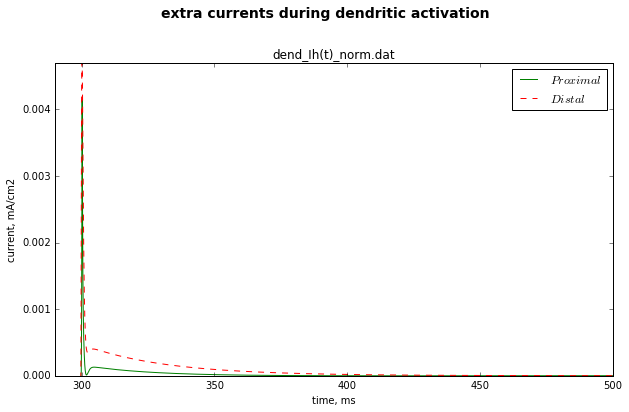

In [341]:
func("dend_Ih(t)_norm.dat")

 f is the file * dend_Iklt(t)_norm.dat * now!
***
 Plot y-axis lims are
 min       max
 -7.858e-05 4.345e-02
***
 Single segment lateral surface area (cm^2)*
 ---> 1.319e-06
***
 The total number of extra unit_charges 
 resulting from dendritic activation is*
 ---> 2.083e+10


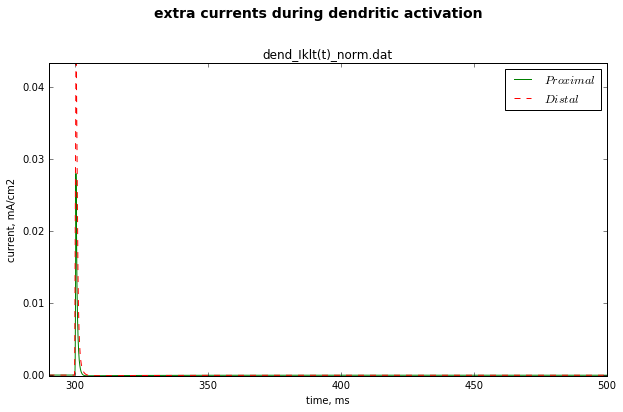

In [338]:
func("dend_Iklt(t)_norm.dat")

 f is the file * dend_Ileak(t)_norm.dat * now!
***
 Plot y-axis lims are
 min       max
 -2.950e-03 6.233e-02
***
 Single segment lateral surface area (cm^2)*
 ---> 1.319e-06
***
 The total number of extra unit_charges 
 resulting from dendritic activation is*
 ---> 1.848e+10


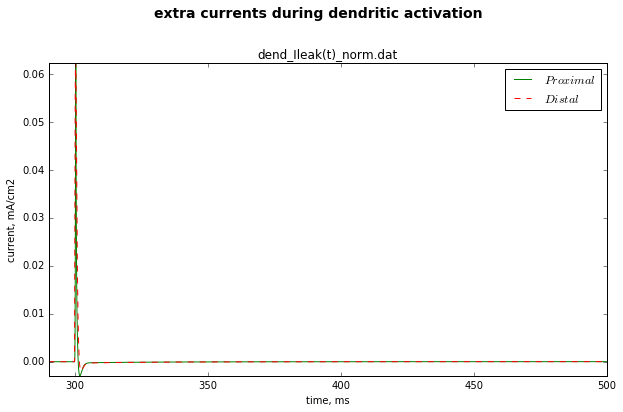

In [340]:
func('dend_Ileak(t)_norm.dat')